<p style="font-family: verdana;font-size: 28px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">TABLE OF CONTENT</p>
    

* [<p style="font-family: verdana;font-size: 18px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">1. Introduction</p>](#index1)
* [<p style="font-family: verdana;font-size: 18px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">2. Importing libraries and datasets</p>](#index2)
* [<p style="font-family: verdana;font-size: 18px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">3. Data preprocessing</p>](#index3)
* [<p style="font-family: verdana;font-size: 18px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">4. EDA</p>](#index4)
* [<p style="font-family: verdana;font-size: 18px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5. Feature Engineering</p>](#index5)

<hr style="height: 0.5px; border: 0; background-color: 'Black'">


![sales](https://cdn.dribbble.com/users/1503100/screenshots/4115965/untitled-3.gif)

<a id="index1"></a>
# <p style="font-family: verdana;font-size: 28px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">1. INTRODUCTION</p>

<p style="font-family: verdana;font-size: 18px">For this project, I'll be working with "Womart," leading nutrition and supplement retail chain that offers a comprehensive range of products for wellness and fitness needs.</p> 

<p style="font-family: verdana;font-size: 18px">The purpose of this notebook will be to predict the number of sales for each store to provide the stores with essential insights into the upcoming inventory and cash flow for the following months. </p>

<p style="font-family: verdana;font-size: 18px">The dataset that they provided contains the information of sales of the past 18 months along with:</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">ID:</span> Unique identifier for a row</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">Store id:</span> Unique id for each store</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">Store type:</span> Type of the store</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">Location type:</span> Type of the location where the store is located</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">Region Code:</span> Code of the region where the store is located</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">Date:</span> Information about the date</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">Holiday:</span> If there is a holiday on the given date</p>

* <p style="font-family: verdana;font-size: 18px"><span style="color:crimson;">Discount:</span> If the store offers a discount on the given date</p>

<p style="font-family: verdana;font-style: bold;font-size: 18px">NOTE: Work in progress. Notebook not finished.</p>

<hr style="height: 0.5px; border: 0; background-color: 'Black'">

<a id="index2"></a>
# <p style="font-family: verdana;font-size: 28px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">2. IMPORTING LIBRARIES AND DATASETS</p>

In [8]:
pip install lightgbm

     |████████████████████████████████| 1.2 MB 4.2 MB/s 
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing the necesary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import proplot as pplt                       # Fonts 
from scipy import stats                      # Remove outliers
import matplotlib.ticker as ticker           # Modify axis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split




import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Importing data
sales = pd.read_csv('/Users/sabrina/Documents/Careers/Data Analytics/Github/Sabrina/CEBU/Orders/Amazon Sales.csv')

In [3]:
sales.columns

Index(['Month', '(Parent) ASIN', '(Child) ASIN', 'Title', 'Size', 'Color',
       'Toe', 'Name', 'Orders', 'SKU - Power BI', 'Price Warehouse',
       'Cost Warehouse', 'Margen', 'Sessions', 'Session Percentage',
       'Page Views', 'Page Views Percentage',
       'Featured Offer (Buy Box) Percentage', 'Units Ordered',
       'Units Ordered - B2B', 'Unit Session Percentage',
       'Unit Session Percentage - B2B', 'Ordered Product Sales',
       'Ordered Product Sales - B2B', 'Total Order Items',
       'Total Order Items - B2B'],
      dtype='object')

In [6]:
sales.groupby(['(Child) ASIN']).sum()

,Size,Orders,Sessions,Units Ordered,Units Ordered - B2B,Total Order Items,Total Order Items - B2B
(Child) ASIN,,,,,,,
B00CBHJRKY,31.5,5,20,5,0,5,0
B00CBHK9P6,22.0,3,12,3,0,3,0
B00CBHKDNY,12.0,1,4,1,0,1,0
B00CBHKRTY,18.0,4,181,4,0,4,0
B00CBHKVCC,6.5,1,2,1,0,1,0
...,...,...,...,...,...,...,...
B096T5C388,11.0,1,0,1,0,1,0
B096T5CY4M,13.0,1,0,1,0,1,0
B096T61QNY,7.0,1,0,1,0,1,0


In [28]:
sales.drop(sales[sales['Sales'] == 0].index, inplace=True)

In [33]:
sales.drop(columns=['Sales','Payment Detail','Payment Type','Transaction type','Include','Q', 'V', 'D','New', 'Q New', 'Q Old','PeriodLR','PrdSKU_Temp', 'PrdSKU_Manual','PrdSKU'], inplace=True)

KeyError: "['Sales' 'Payment Detail' 'Payment Type' 'Transaction type' 'Include' 'Q'\n 'V' 'D' 'New' 'Q New' 'Q Old' 'PeriodLR' 'PrdSKU_Temp' 'PrdSKU_Manual'\n 'PrdSKU'] not found in axis"

In [34]:
sales.head()

,Date,Order ID,SKU,Amount,Quantity,Product Title,PO,Invoice AdPro,Billing Name,Period,Quincena,Year,Month,VarSKU
4,6-Mar-20,114-5766430-3024267,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2795,50545,Michael,202003,1,2020,3,s7656
7,9-Mar-20,114-0157544-2549828,4600401295,$108.00,1.0,"CEBU Men's Comfort 10"" Steel-Toe Work Boot - B...",BCO2798,50555,Tony Martinez,202003,1,2020,3,s1365
10,9-Mar-20,111-4721815-3043449,15200101280,$115.00,1.0,"CEBU Men's Borceshark 6"" Work Boot - Brown 9 US",BCO2796,No,Deborah Cruz,202003,1,2020,3,s6218
13,9-Mar-20,113-7733665-0201823,15000101280,$102.00,1.0,CEBU Men's Botin Work Boot - Brown 9 US,BCO2799,50556,Robert Hiltner,202003,1,2020,3,s5148
15,9-Mar-20,111-9906472-2971449,4600101280,$108.00,1.0,"CEBU Men's Comfort 10"" Steel-Toe Work Boot - B...",BCO2797,50554,osana,202003,1,2020,3,s1311


In [31]:
variations.columns

Index(['Title', 'Color', 'Size', 'SKU'], dtype='object')

In [35]:
df = pd.merge(sales, variations, how='inner', left_on = 'VarSKU', right_on = 'SKU')

In [38]:
df.drop(columns=['Title','SKU_y'], inplace=True)

In [39]:
df.head()

,Date,Order ID,SKU_x,Amount,Quantity,Product Title,PO,Invoice AdPro,Billing Name,Period,Quincena,Year,Month,VarSKU,Color,Size
0,6-Mar-20,114-5766430-3024267,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2795,50545,Michael,202003,1,2020,3,s7656,Tan,10.5
1,6-Mar-20,114-5766430-3024267,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2795,50545,Michael,202003,1,2020,3,s7656,Tan,10.5
2,15-Apr-20,111-0312883-0720250,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2912,50859,Todd Dietman,202004,1,2020,4,s7656,Tan,10.5
3,15-Apr-20,111-0312883-0720250,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2912,50859,Todd Dietman,202004,1,2020,4,s7656,Tan,10.5
4,3-Jun-20,114-1636767-5537800,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO3182,51655,Teresa De Luna,202006,1,2020,6,s7656,Tan,10.5


In [42]:
df.rename(columns={'SKU_x': 'SKU_Amazon', 'VarSKU': 'SKU_Shopify'}, inplace=True)
df.head()

,Date,Order ID,SKU_Amazon,Amount,Quantity,Product Title,PO,Invoice AdPro,Billing Name,Period,Quincena,Year,Month,SKU_Shopify,Color,Size
0,6-Mar-20,114-5766430-3024267,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2795,50545,Michael,202003,1,2020,3,s7656,Tan,10.5
1,6-Mar-20,114-5766430-3024267,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2795,50545,Michael,202003,1,2020,3,s7656,Tan,10.5
2,15-Apr-20,111-0312883-0720250,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2912,50859,Todd Dietman,202004,1,2020,4,s7656,Tan,10.5
3,15-Apr-20,111-0312883-0720250,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO2912,50859,Todd Dietman,202004,1,2020,4,s7656,Tan,10.5
4,3-Jun-20,114-1636767-5537800,35600001701295,$150.00,1.0,"Toro Men's TRC1 10"" Steel-Toe Work Boot - Tan ...",BCO3182,51655,Teresa De Luna,202006,1,2020,6,s7656,Tan,10.5


In [79]:
b = []

for i in categories['Products']:
    i = str(i)
    if i.endswith('(S)'):
        b += [i[:-4]]
    else:
        b += [i]

categories['Name'] = b
categories.head()

,List,Products,SKU,AVG of Price,AVG of Cost,AVG Profit,Profit %,% E-commerce,% B2B,Priority,Toe,Name
0,1,Comfort (S),A/C,$ 49.50,$ 28.50,$ 21.00,73.7 %,0.12%,0.88%,1,Steel,Comfort
1,2,Comfort,S/C,$ 47.50,$ 27.50,$ 20.00,72.7 %,4.41%,2.09%,1,Soft,Comfort
2,3,Farmer (S),A/FARMER,$ 60.50,$ 33.50,$ 27.00,80.6 %,0.88%,3.37%,1,Steel,Farmer
3,4,Farmer,FARMER,$ 59.50,$ 32.50,$ 27.00,83.1 %,6.39%,3.76%,1,Soft,Farmer
4,5,HL100,HL-100,$ 56.00,$ 33.00,$ 23.00,69.7 %,0.14%,1.35%,1,Soft,HL100


In [216]:
categories = pd.read_csv('/Users/sabrina/Documents/Careers/Data Analytics/Github/Sabrina/CEBU/Inventory Managment/Categories.csv')
categories.head()

,Priority,SKU,Name,Toe,AVG of Price,AVG of Cost,AVG Profit,Profit %,% E-commerce,% B2B
0,2,WP,WP,Soft,$ 82.00,$ 48.32,$ 33.68,69.7 %,0.04%,0.81%
1,2,P/WP,WP,Composite,$ 85.00,$ 49.51,$ 35.49,71.7 %,0.00%,0.59%
2,2,ULTRA 300,Ultra 300,Soft,$ 64.00,$ 38.50,$ 25.50,66.2 %,0.00%,0.00%
3,1,TRC3P STL,TRC3P,Steel,$ 78.00,$ 45.50,$ 32.50,71.4 %,6.58%,5.92%
4,1,TRC3P,TRC3P,Soft,$ 76.00,$ 44.00,$ 32.00,72.7 %,0.90%,2.64%


In [217]:
flag1 = pd.DataFrame()
flag2 = pd.DataFrame()

for i in range(0,categories['Name'].size):
    flag1 = df.loc[df['Product Title'].str.contains(categories.iloc[i,2]) & df['Product Title'].str.contains(categories.iloc[i,3])]
    flag1['Priority'] = categories.iloc[i,0]
    flag1['SKU_PowerBI'] = categories.iloc[i,1]
    flag1['Name'] = categories.iloc[i,2]
    flag1['Toe'] = categories.iloc[i,3]
    flag1['Profit'] = categories.iloc[i,6]
    flag2 = flag2.append(flag1)

flag2

,Date,Order ID,SKU_Amazon,Amount,Quantity,Product Title,PO,Invoice AdPro,Billing Name,Period,...,Year,Month,SKU_Shopify,Color,Size,Priority,SKU_PowerBI,Name,Toe,Profit
3660,14-Jul-20,111-8627105-9961046,a10017,$136.00,1.0,"CEBU Men's WP Waterproof Soft Toe 10"" Pull On ...",BCO3390,52387,Andrew Gump,202007,...,2020,7,s10055,Black,12.0,2,WP,WP,Soft,$ 33.68
3661,25-Jan-21,114-9367695-2656210,a10017,$136.00,1.0,"CEBU Men's WP Waterproof Soft Toe 10"" Pull On ...",BCO5159,56261,gilberto,202101,...,2021,1,s10055,Black,12.0,2,WP,WP,Soft,$ 33.68
3662,22-Mar-21,111-6520737-5174606,a10017,$136.00,1.0,"CEBU Men's WP Waterproof Soft Toe 10"" Pull On ...",BCO5905,57654,charlie troncale,202103,...,2021,3,s10055,Black,12.0,2,WP,WP,Soft,$ 33.68
6586,13-Oct-20,113-3966585-2876260,a10003,$172.00,1.0,"CEBU Men's WP Waterproof Soft Toe 10"" Pull On ...",BCO4003,54100,desiarea,202010,...,2020,10,s10003,Brown,11.0,2,WP,WP,Soft,$ 33.68
6974,11-Nov-20,113-8382089-5723469,a10014,$136.00,1.0,"CEBU Men's WP Waterproof Soft Toe 10"" Pull On ...",BCO4255,54662,Steve gregg,202011,...,2020,11,s10014,Black,10.0,2,WP,WP,Soft,$ 33.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,3-Sep-20,114-0874671-5453023,a9984,$124.00,1.0,"TORO BRAVO Women's TLC1WN Steel Toe Cowgirl 8""...",BCO3665,53341,Flores,202008,...,2020,9,s9984,Tan,7.0,3,TLC1 STL,TLC1,Steel,$ 27.50
7098,30-Nov-20,112-3029030-0836256,a7748,$134.00,1.0,"TORO BRAVO Men's TLC1 Steel Toe Cowboy 8"" Work...",BCO4430,54989,sandra,202012,...,2020,11,s7748,Tan,10.0,3,TLC1 STL,TLC1,Steel,$ 27.50
7099,30-Nov-20,112-3029030-0836256,a7748,$134.00,1.0,"TORO BRAVO Men's TLC1 Steel Toe Cowboy 8"" Work...",BCO4430,54989,sandra,202012,...,2020,11,s7748,Tan,10.0,3,TLC1 STL,TLC1,Steel,$ 27.50
8228,16-Mar-21,114-6586203-4835400,a7746,$134.00,1.0,"TORO BRAVO Men's TLC1 Steel Toe Cowboy 8"" Work...",BCO5780,57466,Lilly Richards,202103,...,2021,3,s7746,Tan,9.0,3,TLC1 STL,TLC1,Steel,$ 27.50


In [227]:
flag2['Date'] = flag2['Date'].astype('datetime64')

In [228]:
flag2.sort_values(by=['Date'], inplace=True, ascending=True)
flag2

,Date,Order ID,SKU_Amazon,Amount,Quantity,Product Title,PO,Invoice AdPro,Billing Name,Period,...,Year,Month,SKU_Shopify,Color,Size,Priority,SKU_PowerBI,Name,Toe,Profit
1898,2020-04-27,113-6994931-6670636,a10024,$177.00,1.0,"CEBU Men's WP Composite Toe Waterproof 10"" Pul...",BCO2968,50982,lesliee,202004,...,2020,4,s10024,Brown,8.0,2,P/WP,WP,Composite,$ 35.49
2298,2020-05-04,113-2307696-8481806,a4562,$102.00,1.0,"CEBU Men's Max Soft Toe Versatile 10"" Pull On ...",BCO3020,51097,Phil Miller,202005,...,2020,5,s4562,Brown,11.0,1,S/MAX,Max,Soft,$ 19.00
2440,2020-05-06,112-8402482-3773841,a4527,$79.00,1.0,"CEBU Men's Max Soft Toe Versatile 10"" Pull On ...",BCO3043,51159,Hugo venegas,202005,...,2020,5,s4527,Honey,8.5,1,S/MAX,Max,Soft,$ 19.00
2452,2020-05-06,112-6513474-9041808,a4526,$79.00,1.0,"CEBU Men's Max Soft Toe Versatile 10"" Pull On ...",BCO3042,51158,Hugo venegas,202005,...,2020,5,s4526,Honey,8.0,1,S/MAX,Max,Soft,$ 19.00
2510,2020-05-11,113-5651984-8073804,a7784,$124.00,1.0,"CEBU Men's BorceShark Steel Toe Versatile 6"" W...",BCO3058,51212,Ivan Teurbe-Tolon,202005,...,2020,5,s7784,Brown,8.0,2,A/BORCESAHARK,BorceShark,Steel,$ 25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,2021-09-17,113-8959123-8902614,a9264,$110.00,1.0,"CEBU Men's Max Grip Soft Toe Non Slip 10"" Pull...",BCO9639,63388,Asia Pitts,202109,...,2021,9,s9264,Black,13.0,1,S/MAX,Max,Soft,$ 19.00
8859,2021-09-17,113-8959123-8902614,a9264,$110.00,1.0,"CEBU Men's Max Grip Soft Toe Non Slip 10"" Pull...",BCO9639,63388,Asia Pitts,202109,...,2021,9,s9264,Black,13.0,1,S/MAX,Max,Soft,$ 19.00
1650,2021-09-17,111-1481190-0632248,a7282,$161.00,1.0,"TORO BRAVO Men's TRC3P Steel Toe Cowboy 10"" Pu...",BCO9641,63401,Mona,202109,...,2021,9,s7282,Brown,9.0,1,TRC3P STL,TRC3P,Steel,$ 32.50
2409,2021-09-17,114-2443624-7220248,a6925,$134.00,1.0,"CEBU Men's Farmer Steel Toe Cowboy 10"" Pull On...",BCO9640,63389,Susan E Wellhausen,202109,...,2021,9,s6925,Brown,11.0,1,A/FARMER,Farmer,Steel,$ 27.00


In [229]:
flag2.columns

Index(['Date', 'Order ID', 'SKU_Amazon', 'Amount', 'Quantity', 'Product Title',
       'PO', 'Invoice AdPro', 'Billing Name', 'Period', 'Quincena', 'Year',
       'Month', 'SKU_Shopify', 'Color', 'Size', 'Priority', 'SKU_PowerBI',
       'Name', 'Toe', 'Profit'],
      dtype='object')

<a id="index3"></a>
# <p style="font-family: verdana;font-size: 28px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">3. DATA PREPROCESSING</p>

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">3.1 Rename Values</p>

In [231]:
# Rename the values on "Discount" 
df = flag2[['Date','Order ID', 'PO', 'Period', 'Quincena', 'Year',
       'Month', 'Invoice AdPro', 'SKU_Amazon','SKU_Shopify','SKU_PowerBI', 'Amount', 'Quantity', 'Product Title', 'Color', 'Size', 'Name', 'Toe', 'Profit', 'Priority']]
df

,Date,Order ID,PO,Period,Quincena,Year,Month,Invoice AdPro,SKU_Amazon,SKU_Shopify,SKU_PowerBI,Amount,Quantity,Product Title,Color,Size,Name,Toe,Profit,Priority
1898,2020-04-27,113-6994931-6670636,BCO2968,202004,2,2020,4,50982,a10024,s10024,P/WP,$177.00,1.0,"CEBU Men's WP Composite Toe Waterproof 10"" Pul...",Brown,8.0,WP,Composite,$ 35.49,2
2298,2020-05-04,113-2307696-8481806,BCO3020,202005,1,2020,5,51097,a4562,s4562,S/MAX,$102.00,1.0,"CEBU Men's Max Soft Toe Versatile 10"" Pull On ...",Brown,11.0,Max,Soft,$ 19.00,1
2440,2020-05-06,112-8402482-3773841,BCO3043,202005,1,2020,5,51159,a4527,s4527,S/MAX,$79.00,1.0,"CEBU Men's Max Soft Toe Versatile 10"" Pull On ...",Honey,8.5,Max,Soft,$ 19.00,1
2452,2020-05-06,112-6513474-9041808,BCO3042,202005,1,2020,5,51158,a4526,s4526,S/MAX,$79.00,1.0,"CEBU Men's Max Soft Toe Versatile 10"" Pull On ...",Honey,8.0,Max,Soft,$ 19.00,1
2510,2020-05-11,113-5651984-8073804,BCO3058,202005,1,2020,5,51212,a7784,s7784,A/BORCESAHARK,$124.00,1.0,"CEBU Men's BorceShark Steel Toe Versatile 6"" W...",Brown,8.0,BorceShark,Steel,$ 25.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,2021-09-17,113-8959123-8902614,BCO9639,202109,2,2021,9,63388,a9264,s9264,S/MAX,$110.00,1.0,"CEBU Men's Max Grip Soft Toe Non Slip 10"" Pull...",Black,13.0,Max,Soft,$ 19.00,1
8859,2021-09-17,113-8959123-8902614,BCO9639,202109,2,2021,9,63388,a9264,s9264,S/MAX,$110.00,1.0,"CEBU Men's Max Grip Soft Toe Non Slip 10"" Pull...",Black,13.0,Max,Soft,$ 19.00,1
1650,2021-09-17,111-1481190-0632248,BCO9641,202109,2,2021,9,63401,a7282,s7282,TRC3P STL,$161.00,1.0,"TORO BRAVO Men's TRC3P Steel Toe Cowboy 10"" Pu...",Brown,9.0,TRC3P,Steel,$ 32.50,1
2409,2021-09-17,114-2443624-7220248,BCO9640,202109,2,2021,9,63389,a6925,s6925,A/FARMER,$134.00,1.0,"CEBU Men's Farmer Steel Toe Cowboy 10"" Pull On...",Brown,11.0,Farmer,Steel,$ 27.00,1


## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">3.2 Data Types</p>

In [232]:
# Data types
print('Data type per variable:')
print(df.dtypes)

Data type per variable:
Date             datetime64[ns]
Order ID                 object
PO                       object
Period                    int64
Quincena                  int64
Year                      int64
Month                     int64
Invoice AdPro            object
SKU_Amazon               object
SKU_Shopify              object
SKU_PowerBI              object
Amount                   object
Quantity                float64
Product Title            object
Color                    object
Size                    float64
Name                     object
Toe                      object
Profit                   object
Priority                  int64
dtype: object


In [254]:
df['Amount'] = df['Amount'].str.replace('$','')

In [255]:
# Changing data types
df['Quantity'] = df['Quantity'].astype(int)
df['Amount'] = df['Amount'].astype(float)
df[['Period', 'Quincena', 'Year', 'Month', 'Priority']] = df[['Period', 'Quincena', 'Year', 'Month', 'Priority']].astype(object)

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">3.3 Duplicates and Missing Values</p>

In [256]:
# Do we have duplicates?
print('Number of duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
print('Number of missing values:', df.isnull().sum().sum())

Number of duplicates: 1973
Number of missing values: 0


In [250]:
pip install openpyxl

     |████████████████████████████████| 242 kB 2.8 MB/s 
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [257]:
df.to_csv('/Users/sabrina/Documents/Careers/Data Analytics/Github/Sabrina/CEBU/Inventory Managment/SalesModified.csv', index = False)

df.to_excel('/Users/sabrina/Documents/Careers/Data Analytics/Github/Sabrina/CEBU/Inventory Managment/SalesModified.xlsx', index = False)

<a id="index4"></a>
# <p style="font-family: verdana;font-size: 28px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">4. EDA</p>

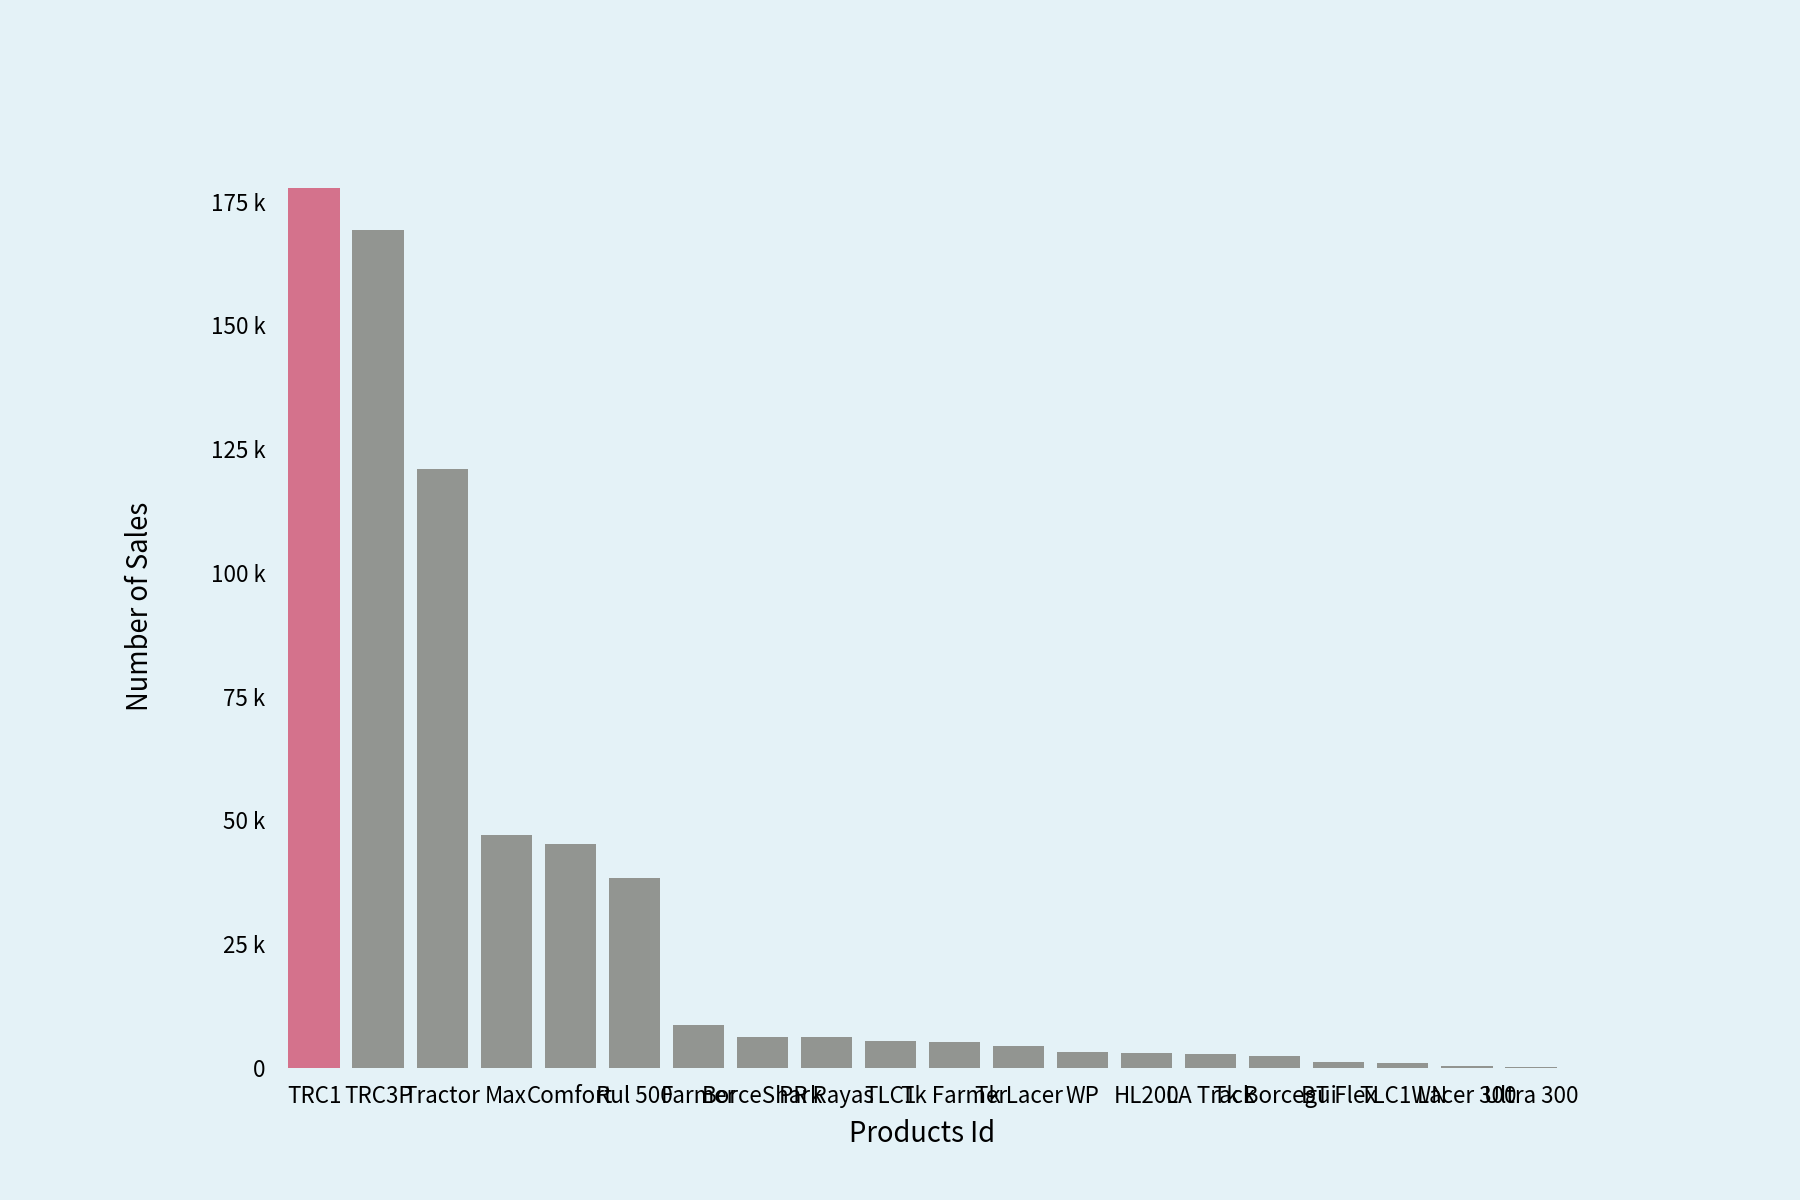

In [258]:
# Which are the best stores (by number of sells)?
best_products = df.groupby(['Name'], as_index=False)['Amount'].sum()        # sum sales from same store
best_products = best_products.sort_values('Amount', ascending = False)                # sort data
best_products = best_products.head(20)                                               # select top 20
best_products['Name'] = best_products['Name'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_products.head(1)
col2 = best_products.tail(19)

ax.bar(col1.Name, col1.Amount, color = '#d4728c')
ax.bar(col2.Name, col2.Amount, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Products Id', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(4.1, 56000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(6.2, 56000000, "Stores", size=22, color="#d4728c", fontweight="bold")
plt.text(9.1, 56000000, "by", size=22, color="grey")
plt.text(10.3, 56000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [ ]:
# Which are the best store types (by number of sales)?
best_store_type = train.groupby(['Store_Type'], as_index=False)['Sales'].sum()    
best_store_type = best_store_type.sort_values('Sales', ascending = False)                  
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_store_type.head(1)
col2 = best_store_type.tail(3)

ax.bar(col1.Store_Type, col1.Sales, color = '#72d489')
ax.bar(col2.Store_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Store Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.25, 3555000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.65, 3555000000, "Store Type", size=22, color="#72d489", fontweight="bold")
plt.text(1.6, 3555000000, "by", size=22, color="grey")
plt.text(1.82, 3555000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [ ]:
# Best months by sells
best_month = train.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

best_month_1 = best_month.sort_values('Sales', ascending = False).head(1)

ax.plot(best_month.Month, best_month.Sales, marker='o', markerfacecolor='grey', color = 'gray', markersize=9)
ax.plot(best_month_1.Month, best_month_1.Sales, marker='o', markerfacecolor='#5495c9', color = '#5495c9', markersize=16)

plt.xticks(rotation=30)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Annotations
plt.text(13.4, 573000000, "May 2019 has been", size=10)
plt.text(13.4, 566000000, "the best month so far!", size=10)


# Title
plt.text(3.45, 582000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(5.1, 582000000, "Months", size=22, color="#5495c9", fontweight="bold")
plt.text(7.8, 582000000, "by", size=22, color="grey")
plt.text(8.8, 582000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(38, 43000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [ ]:
# Which are the best locations (by number of sales)?
best_location = train.groupby(['Location_Type'], as_index=False)['Sales'].sum()    
best_location['Location_Type'] = best_location['Location_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_location.head(1)
col2 = best_location.tail(4)

ax.bar(col1.Location_Type, col1.Sales, color = '#ab90ff')
ax.bar(col2.Location_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Location Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.26, 3750000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.79, 3750000000, "Location Type", size=22, color="#ab90ff", fontweight="bold")
plt.text(2.3, 3750000000, "by", size=22, color="grey")
plt.text(2.6, 3750000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [ ]:
# Which are the best regions (by number of sales)?
best_region = train.groupby(['Region_Code'], as_index=False)['Sales'].sum()    
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_region.head(1)
col2 = best_region.tail(3)

ax.bar(col1.Region_Code, col1.Sales, color = '#ffab90')
ax.bar(col2.Region_Code, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Region Codes', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.4, 3200000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.79, 3200000000, "Regions", size=22, color="#ffab90", fontweight="bold")
plt.text(1.47, 3200000000, "by", size=22, color="grey")
plt.text(1.71, 3200000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [ ]:
# Holidays Distribution
holiday = train.groupby(['Holiday'], as_index=False)['Sales'].sum()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')

mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.pie(holiday['Sales'], 
        explode=(0.2, 0), 
        labels=['Not Holidays', 'Holidays'], 
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=200)
        
plt.axis('equal')

plt.text(-1.17, 1.15, "Holiday", size=30, color="lightcoral", fontweight="bold")
plt.text(-0.45, 1.15, "Distribution", size=30, color="grey", fontweight="bold")
plt.text(0.65, 1.15, "by", size=30, color="grey")
plt.text(0.9, 1.15, "Sales", size=30, color="grey", fontweight="bold")

plt.show()

In [ ]:
# Discount distribution
discount = train.groupby(['Discount'], as_index=False)['Sales'].sum()    
discount['Discount'] = discount['Discount'].astype(str)
discount.head()

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')

mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.pie(discount['Sales'], 
        labels=['No Discount', 'Discount'], 
        explode=(0.05, 0),
        colors= ['#e4ff90', '#ff90e4'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=270)
        
plt.axis('equal')

plt.text(-1.29, 1.15, "Discount", size=30, color="#ff90e4", fontweight="bold")
plt.text(-0.48, 1.15, "Distribution", size=30, color="grey", fontweight="bold")
plt.text(0.63, 1.15, "by", size=30, color="grey")
plt.text(0.87, 1.15, "Sales", size=30, color="grey", fontweight="bold")

plt.show()


<hr style="height: 0.5px; border: 0; background-color: 'Black'">

<a id="index5"></a>
# <p style="font-size: 28px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5. FEATURE ENGINEERING</p>

In [ ]:
# Let's check the data again
train.head()

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5.1 ID</p>

<p style="font-family: verdana;font-size: 18px">The "ID" column will be useless for our prediction, so I'll drop it.</p>

In [ ]:
# Remove "ID" 
train = train.drop('ID', 1)

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5.2 Changing data types for the model</p>

In [ ]:
# Data types
print('Data type per variable:')
print(train.dtypes)

In [ ]:
train[['Store_id','Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(int)

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5.3 Categorical variables</p>

<p style="font-family: verdana;font-size: 18px">For the categorical variables, I'm going to transform them into dummies variables. This process is known as "One-Hot Encoding."</p>

In [ ]:
categ_cols = train.dtypes[train.dtypes == np.object]  # filtering by categorical variables
categ_cols = categ_cols.index.tolist()     # list of categorical fields
train = pd.get_dummies(train, columns=categ_cols, drop_first=True)   # One hot encoding

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5.4 Date</p>

In [ ]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day_of_week'] = train['Date'].dt.dayofweek
train['Weekday'] = train['Date'].dt.weekday
train['Quarter'] = train['Date'].dt.quarter

train = train.drop(['Date'], axis = 1) 

train = pd.get_dummies(train, columns=['Year'], drop_first=True, prefix='Year')
train = pd.get_dummies(train, columns=['Month'], drop_first=True, prefix='Month')
train = pd.get_dummies(train, columns=['Day_of_week'], drop_first=True, prefix='Day_of_week')
train = pd.get_dummies(train, columns=['Weekday'], drop_first=True, prefix='Weekday')
train = pd.get_dummies(train, columns=['Quarter'], drop_first=True, prefix='Quarter')

train.head()

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5.5 Target's correlations</p>

<p style="font-family: verdana;font-size: 18px">Checking the target's correlation with other variables will be helpful to determine with features are not crucial for the prediction.</p>

In [ ]:
corr = train[train.columns].corr()['Sales'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.Sales > 0.90].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 10))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

ax.barh(corr.index, corr.Sales, align='center', color = np.where(corr['Sales'] < 0, 'crimson', '#89CFF0'))

ax.tick_params(axis='both', which='major', labelsize=8)
ax.yaxis.set_label_coords(0, 0)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.text(-0.295, 43, "Correlation", size=24, color="grey", fontweight="bold");
plt.text(-0.055, 43, "of", size=24, color="grey");
plt.text(0, 43, "Sales", size=24, color="crimson", fontweight="bold");
plt.text(0.12, 43, "to", size=24, color="grey");
plt.text(0.17, 43, "Other Features", size=24, color="grey", fontweight="bold");

# Author
plt.text(0.6, -7, "@miguelfzzz", fontsize=11, ha="right", color='grey');

* <p style="font-family: verdana;font-size: 18px">In my case, I'm going to remove the <span style="color:crimson;">year</span> and <span style="color:crimson;">store id</span>.</p>

In [ ]:
del train['Store_id']
del train['Year_2019']

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5.6 Creating interesting features</p>

In [ ]:
train['holiday_and_discount'] = train['Holiday'] * train['Discount']

## <p style="font-family: verdana;font-size: 23px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">5.7 Sales</p>

### <p style="font-family: verdana;font-size: 20px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">Outliers</p>

<p style="font-family: verdana;font-size: 18px">Outliers are a silent killer in the prediction models. In this section, I follow the advice of this 
    <a href="https://www.kaggle.com/nareshbhat/outlier-the-silent-killer" target="_blank">kernel</a> to use the median imputation to work the outliers.</p>

In [ ]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train.Sales);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (before)', size=22, fontweight="bold");

In [ ]:
# Dealing with the outliers
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sales'])
for i in train['Sales']:
    if i > Upper_tail or i < Lower_tail:
            train['Sales'] = train['Sales'].replace(i, med)

# I took the code from this notebook -> https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

In [ ]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train['Sales']);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (after)', size=22, fontweight="bold");

### <p style="font-family: verdana;font-size: 20px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">Scaling target variable</p>

<p style="font-family: verdana;font-size: 18px">In my case, I'll scale my target variable to perform better in the predictive model.</p>

<p style="text-align: center;font-family: verdana;font-size:18px;font-style: italic">"A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable."</p>

In [ ]:
# Normalization on Sales
train['Sales'] = MinMaxScaler().fit_transform(np.array(train['Sales']).reshape(-1,1))

In [ ]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.distplot(train['Sales'], color="#35a79c");

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Y axis position

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Sales', fontsize=11)
plt.ylabel('Frequency', fontsize=11, labelpad=20);

plt.text(0.27, 4, "Sales", size=24, color="#35a79c", fontweight="bold");
plt.text(0.42, 4, "Distribution", size=24, color="grey", fontweight="bold");

# Author
plt.text(285000, -3000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

<p style="font-family: verdana;font-size: 18px">Sales are now normally distributed, great!</p>

<hr style="height: 0.5px; border: 0; background-color: 'Black'">

# <p style="font-size: 28px;font-style: bold; letter-spacing: 2px; color: grey; line-height:1.0">6. PREDICTION MODEL</p>

<p style="font-family: verdana;font-size: 24px">Work in progress... If you liked it so far, please don't forget to comment and upvote. Thank you!</p>
